#  

# CZ4171 - IoT:Communications and Networking Course Project
> This Python Notebook is written to train and test an image recognition model for use with the application developed for the course project of course CZ4171. 

## Table of content
- [Setup](#setup)
- [Libraries](#libraries)
- [Training and validating](#Training_and_validating)
 - [Load dataset](#load_dataset)
 - [Normalizing dataset](#normalizing_dataset)
 - [Defining model](#defining_model)
 - [Training model](#training_model)

## Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## run this cell to resolve dependencies issues
! pip install tensorflow keras numpy pillow scipy matplotlib --upgrade
! pip install kaggle

     |████████████████████████████████| 4.3 MB 8.2 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 11.2 MB 44.9 MB/s 
     |████████████████████████████████| 462 kB 49.9 MB/s 
     |████████████████████████████████| 895 kB 39.2 MB/s 
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have i

In [ ]:
## kaggle set up
! mkdir ~/.kaggle
! cp "/content/drive/MyDrive/Colab Notebooks/CZ4171/kaggle.json" ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
# download dataset
! kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

 99% 1.96G/1.98G [00:15<00:00, 125MB/s]
100% 1.98G/1.98G [00:15<00:00, 140MB/s]


In [ ]:
%%capture
! unzip fruit-and-vegetable-image-recognition.zip -d fruit-and-vegetable-image-recognition/

## Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Training and validating the model
> Code referenced from: https://www.tensorflow.org/tutorials/images/classification.

### Load dataset

In [ ]:
# constants
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_dir = '/content/fruit-and-vegetable-image-recognition/train'
train_dir = pathlib.Path(train_dir)

val_dir = '/content/fruit-and-vegetable-image-recognition/validation'
val_dir = pathlib.Path(train_dir)

train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  val_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 3115 files belonging to 36 classes.
Found 3115 files belonging to 36 classes.
['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


### Normalizing dataset

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))

### Defining model

In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Training model

In [ ]:
epochs=20

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
98/98 [==============================] - 173s 2s/step - loss: 3.3950 - accuracy: 0.0729 - val_loss: 2.9416 - val_accuracy: 0.1734
Epoch 2/20
98/98 [==============================] - 115s 1s/step - loss: 2.6146 - accuracy: 0.2469 - val_loss: 2.1859 - val_accuracy: 0.3730
Epoch 3/20
98/98 [==============================] - 114s 1s/step - loss: 2.0344 - accuracy: 0.4116 - val_loss: 1.6535 - val_accuracy: 0.5178
Epoch 4/20
98/98 [==============================] - 121s 1s/step - loss: 1.4953 - accuracy: 0.5679 - val_loss: 0.9798 - val_accuracy: 0.7441
Epoch 5/20
98/98 [==============================] - 117s 1s/step - loss: 0.8068 - accuracy: 0.7621 - val_loss: 0.3912 - val_accuracy: 0.9072
Epoch 6/20
98/98 [==============================] - 116s 1s/step - loss: 0.3844 - accuracy: 0.8928 - val_loss: 0.2311 - val_accuracy: 0.9448
Epoch 7/20
98/98 [==============================] - 116s 1s/step - loss: 0.2104 - accuracy: 0.9490 - val_loss: 0.0958 - val_accuracy: 0.9830
Epoch 8/20
98

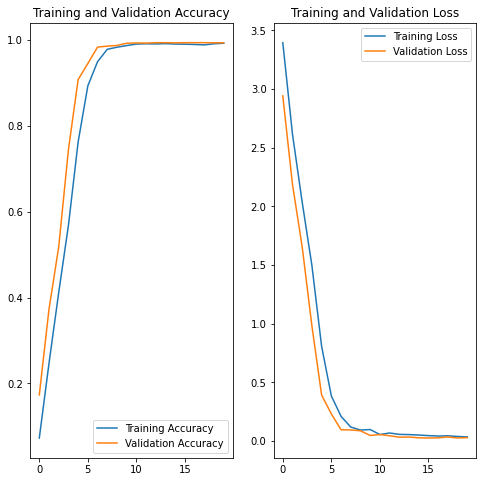

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Saving model

In [ ]:
! mkdir -p models

model.save('models/model-fruit-veg')

INFO:tensorflow:Assets written to: models/model-fruit-veg/assets


In [ ]:
! zip -r model-fruit-veg.zip models/model-fruit-veg/*

! mv model-fruit-veg.zip '/content/drive/MyDrive/Colab Notebooks/CZ4171/'

  adding: models/model-fruit-veg/assets/ (stored 0%)
  adding: models/model-fruit-veg/keras_metadata.pb (deflated 91%)
  adding: models/model-fruit-veg/saved_model.pb (deflated 88%)
  adding: models/model-fruit-veg/variables/ (stored 0%)
  adding: models/model-fruit-veg/variables/variables.data-00000-of-00001 (deflated 27%)
  adding: models/model-fruit-veg/variables/variables.index (deflated 65%)


### Loading model and classifying new inputs

In [ ]:
! cp '/content/drive/MyDrive/Colab Notebooks/CZ4171/model-fruit-veg.zip' /content/
! unzip model-fruit-veg.zip

Archive:  model-fruit-veg.zip
replace models/model-fruit-veg/keras_metadata.pb? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace models/model-fruit-veg/saved_model.pb? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace models/model-fruit-veg/variables/variables.data-00000-of-00001? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace models/model-fruit-veg/variables/variables.index? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
model_dir = '/content/models/model-fruit-veg'
loaded_model = tf.keras.models.load_model(model_dir)

loaded_model.summary()

In [ ]:
img_location = '/content/drive/MyDrive/Colab Notebooks/CZ4171/download.png'
img_path = pathlib.Path(img_location)

img = tf.keras.utils.load_img(
    img_path, target_size=(img_height, img_width)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = loaded_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)